In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import plotly
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [458]:
df=pd.read_csv('Customer Purchase Data.csv')

In [460]:
df.head()

,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
0,1,56,61350.84215,12372.864450,15,77.685590,6232.122440
1,2,46,53777.18224,11001.604230,10,51.858351,5545.849698
2,3,32,39460.32263,8007.385018,19,98.166371,4054.645293
3,4,60,66672.12210,13526.548370,12,62.530976,6815.544393
4,5,38,44459.08553,9059.304083,9,46.470533,4617.833484


In [462]:
#cleaning the data
#Removing the columns
df = df.drop('Number', axis=1)

In [464]:
print(df.head())

   Age       Income  Spending_Score  Membership_Years  Purchase_Frequency  \
0   56  61350.84215    12372.864450                15           77.685590   
1   46  53777.18224    11001.604230                10           51.858351   
2   32  39460.32263     8007.385018                19           98.166371   
3   60  66672.12210    13526.548370                12           62.530976   
4   38  44459.08553     9059.304083                 9           46.470533   

   Last_Purchase_Amount  
0           6232.122440  
1           5545.849698  
2           4054.645293  
3           6815.544393  
4           4617.833484  


In [466]:
# Removing Duplicates
df= df.drop_duplicates()

In [468]:
print(df.head())

   Age       Income  Spending_Score  Membership_Years  Purchase_Frequency  \
0   56  61350.84215    12372.864450                15           77.685590   
1   46  53777.18224    11001.604230                10           51.858351   
2   32  39460.32263     8007.385018                19           98.166371   
3   60  66672.12210    13526.548370                12           62.530976   
4   38  44459.08553     9059.304083                 9           46.470533   

   Last_Purchase_Amount  
0           6232.122440  
1           5545.849698  
2           4054.645293  
3           6815.544393  
4           4617.833484  


In [470]:
#Dropping anu null vlaues
df= df.dropna()

In [472]:
print(df.head())

   Age       Income  Spending_Score  Membership_Years  Purchase_Frequency  \
0   56  61350.84215    12372.864450                15           77.685590   
1   46  53777.18224    11001.604230                10           51.858351   
2   32  39460.32263     8007.385018                19           98.166371   
3   60  66672.12210    13526.548370                12           62.530976   
4   38  44459.08553     9059.304083                 9           46.470533   

   Last_Purchase_Amount  
0           6232.122440  
1           5545.849698  
2           4054.645293  
3           6815.544393  
4           4617.833484  


In [474]:
#Creating new variables
#Average spend per purchase
df['Avg_Spend_Per_Purchase']= df['Spending_Score'] / df['Purchase_Frequency']

In [476]:
print(df['Avg_Spend_Per_Purchase'].head())

0    159.268463
1    212.147204
2     81.569533
3    216.317565
4    194.947281
Name: Avg_Spend_Per_Purchase, dtype: float64


In [478]:
#Step 1: Define age groups (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65, 100]  # adjust as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate average of Avg_Spend_Per_Purchase for each age group
grouped = df.groupby('Age_Group')['Avg_Spend_Per_Purchase'].mean().sort_values(ascending=False)

# Step 3: Display result
print(grouped)

Age_Group
56-65    417.295303
46-55    331.768263
36-45    299.567438
18-25    259.401450
26-35    248.777108
65+             NaN
Name: Avg_Spend_Per_Purchase, dtype: float64


C:\Users\Karan\AppData\Local\Temp\ipykernel_19656\2220861591.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_Group')['Avg_Spend_Per_Purchase'].mean().sort_values(ascending=False)


C:\Users\Karan\AppData\Local\Temp\ipykernel_19656\88320632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='magma')


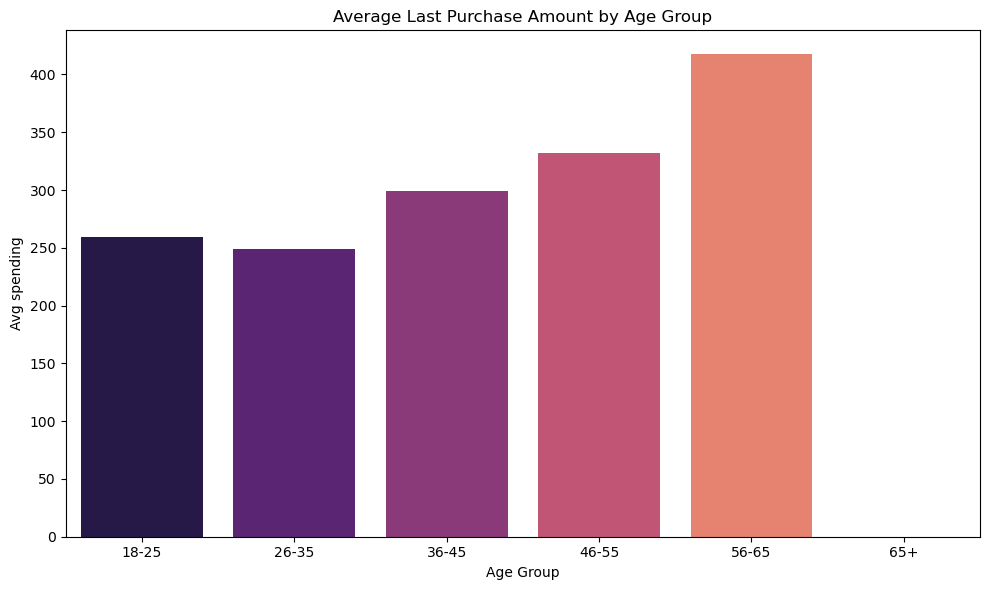

In [480]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='magma')

plt.title('Average Last Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg spending')
plt.tight_layout()
plt.show()

In [481]:
# Choose features for clustering
features = df[['Age', 'Income', 'Spending_Score', 'Membership_Years', 'Purchase_Frequency', 'Spending_to_Income_Ratio', 'Loyalty_Score']]

# Normalize features (very important for K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

KeyError: "['Spending_to_Income_Ratio', 'Loyalty_Score'] not in index"

In [ ]:
#Histogram of Distribution of consumer spending by using kernwel density estimate
plt.figure(figsize=(8, 5))
sns.histplot(df['Last_Purchase_Amount'], bins=30, kde=True)
plt.title('Distribution of Last Purchase Amount')
plt.xlabel('Last Purchase Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#Average income per year
df['Income_Per_Year'] = df['Income'] / df['Membership_Years']
print(df['Income_Per_Year'].head())


In [485]:
#Step 1: Define age groups (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65, 100]  # adjust as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate average of Avg_Income_Per_Year for each age group
grouped = df.groupby('Age_Group')['Income_Per_Year'].mean().sort_values(ascending=False)

# Step 3: Display result
print(grouped)

C:\Users\Karan\AppData\Local\Temp\ipykernel_19656\4167797507.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_Group')['Income_Per_Year'].mean().sort_values(ascending=False)


KeyError: 'Column not found: Income_Per_Year'

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', color='blue')
plt.title('Average Income Per Year')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.grid(True)
plt.tight_layout()
plt.show()

In [488]:
#Recent purchase ratio
df['Recent_Purchase_Ratio'] = df['Last_Purchase_Amount'] / df['Spending_Score']
print(df['Recent_Purchase_Ratio'].head())

0    0.503693
1    0.504095
2    0.506363
3    0.503864
4    0.509734
Name: Recent_Purchase_Ratio, dtype: float64


In [490]:
#Step 1: Define age groups (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65, 100]  # adjust as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate average of Recent_Purchase_Ratio for each age group
grouped = df.groupby('Age_Group')['Recent_Purchase_Ratio'].mean().sort_values(ascending=False)

# Step 3: Display result
print(grouped)

Age_Group
18-25    0.508882
26-35    0.507138
36-45    0.505248
46-55    0.504364
56-65    0.503924
65+           NaN
Name: Recent_Purchase_Ratio, dtype: float64


C:\Users\Karan\AppData\Local\Temp\ipykernel_19656\2021146770.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_Group')['Recent_Purchase_Ratio'].mean().sort_values(ascending=False)


C:\Users\Karan\AppData\Local\Temp\ipykernel_19656\3614735643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='magma')


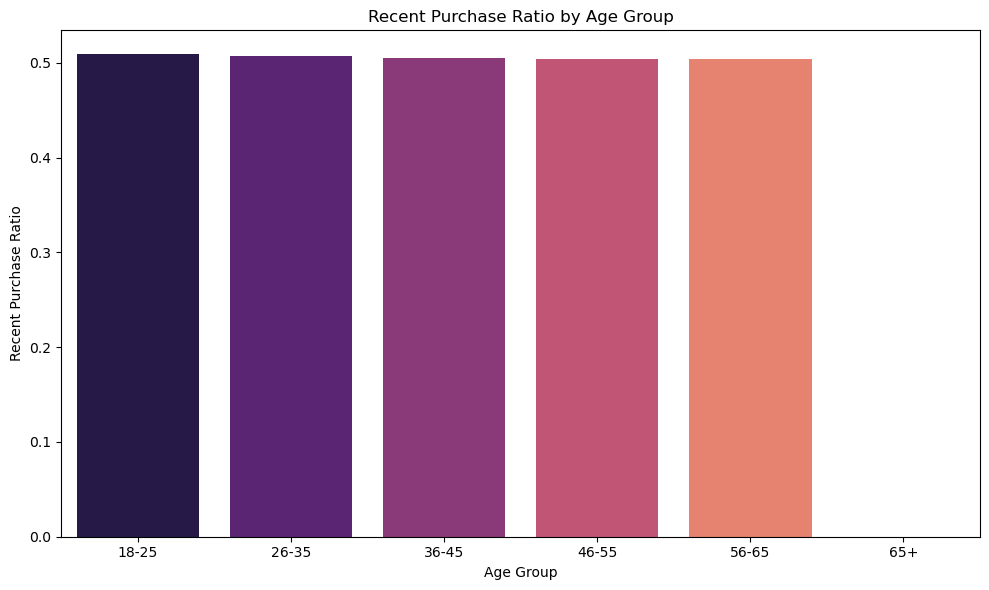

In [492]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='magma')

plt.title('Recent Purchase Ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Recent Purchase Ratio')
plt.tight_layout()
plt.show()

In [494]:
#Loyalty score
df['Loyalty_Score'] = df['Membership_Years'] * df['Purchase_Frequency']
print(df['Loyalty_Score'].head())


0    1165.283846
1     518.583514
2    1865.161040
3     750.371708
4     418.234797
Name: Loyalty_Score, dtype: float64


In [496]:
#Step 1: Define age groups (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65, 100]  # adjust as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate average of Loyalty_Score for each age group
grouped = df.groupby('Age_Group')['Loyalty_Score'].mean().sort_values(ascending=False)

# Step 3: Display result
print(grouped)

Age_Group
56-65    685.903922
46-55    672.462822
36-45    660.020196
26-35    589.983810
18-25    212.915923
65+             NaN
Name: Loyalty_Score, dtype: float64


C:\Users\Karan\AppData\Local\Temp\ipykernel_19656\4133497516.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_Group')['Loyalty_Score'].mean().sort_values(ascending=False)


E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

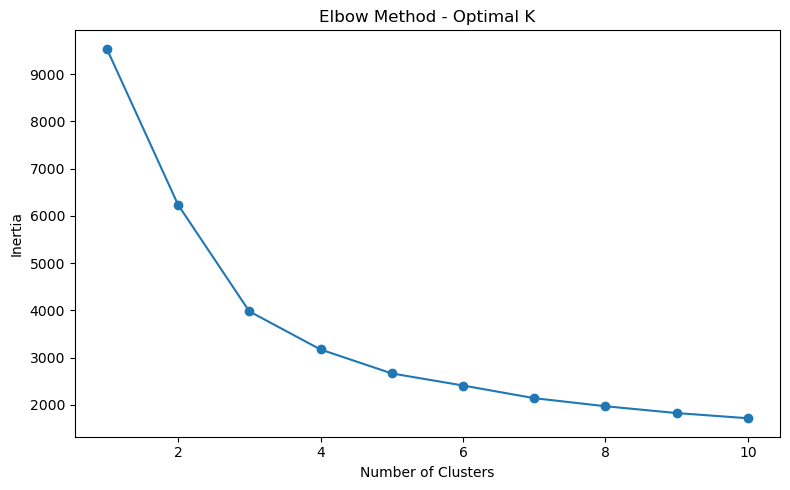

In [498]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

In [500]:
# Use k from elbow method, say k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


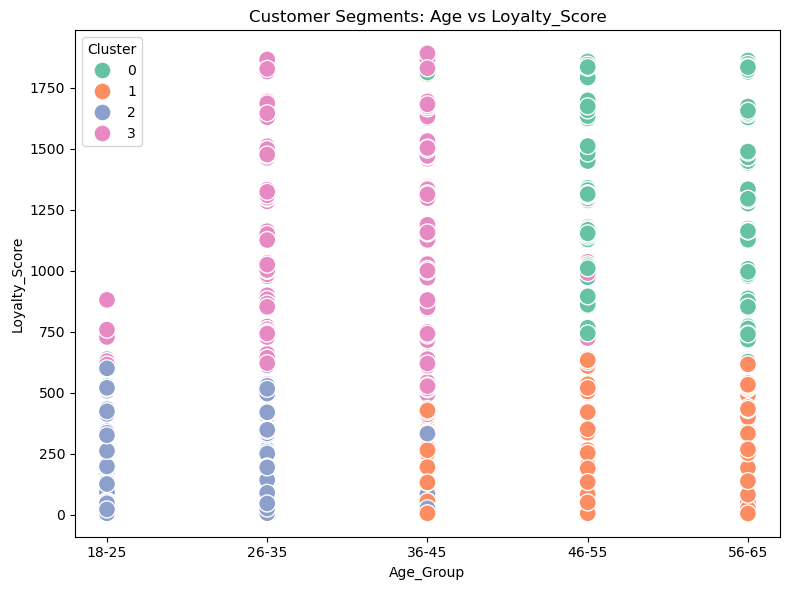

In [502]:
# Example: Age vs Loyalty Score colored by Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age_Group', y='Loyalty_Score', hue='Cluster', palette='Set2', s=150)
plt.title('Customer Segments: Age vs Loyalty_Score')
plt.tight_layout()
plt.show()

In [504]:
#Spending to income ratio
df['Spending_to_Income_Ratio'] = (df['Spending_Score'] / df['Income']) * 100
print(df['Spending_to_Income_Ratio'].head())

0    20.167391
1    20.457755
2    20.292244
3    20.288162
4    20.376722
Name: Spending_to_Income_Ratio, dtype: float64


In [506]:
#Step 1: Define age groups (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65, 100]  # adjust as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate average of Spending_to_Income_ratio for each age group
grouped = df.groupby('Age_Group')['Spending_to_Income_Ratio'].mean().sort_values(ascending=False)

# Step 3: Display result
print(grouped)

Age_Group
18-25    20.407405
26-35    20.294113
36-45    20.217768
46-55    20.187343
56-65    20.163609
65+            NaN
Name: Spending_to_Income_Ratio, dtype: float64


C:\Users\Karan\AppData\Local\Temp\ipykernel_19656\3114718904.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_Group')['Spending_to_Income_Ratio'].mean().sort_values(ascending=False)


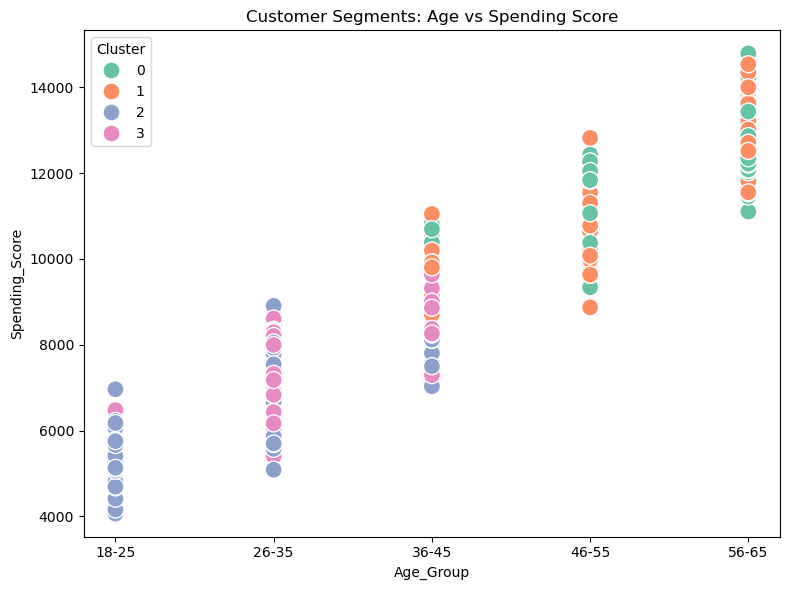

In [508]:
# Example: Age vs Spending_Score colored by Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age_Group', y='Spending_Score', hue='Cluster', palette='Set2', s=150)
plt.title('Customer Segments: Age vs Spending Score')
plt.tight_layout()
plt.show()

In [510]:
#Most valuable Customer by Age Group
df['Customer_Value'] = df['Last_Purchase_Amount'] + (df['Purchase_Frequency'] * df['Membership_Years'])


In [512]:
#Step 1: Define age groups (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65, 100]  # adjust as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate average of Loyalty Score for each age group
grouped = df.groupby('Age_Group')['Customer_Value'].mean().sort_values(ascending=False)

# Step 3: Display result
print(grouped)

Age_Group
56-65    7254.728297
46-55    6234.954034
36-45    5235.658862
26-35    4191.763109
18-25    2961.135216
65+              NaN
Name: Customer_Value, dtype: float64


C:\Users\Karan\AppData\Local\Temp\ipykernel_19656\2308611159.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_Group')['Customer_Value'].mean().sort_values(ascending=False)


C:\Users\Karan\AppData\Local\Temp\ipykernel_19656\171931313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='magma')


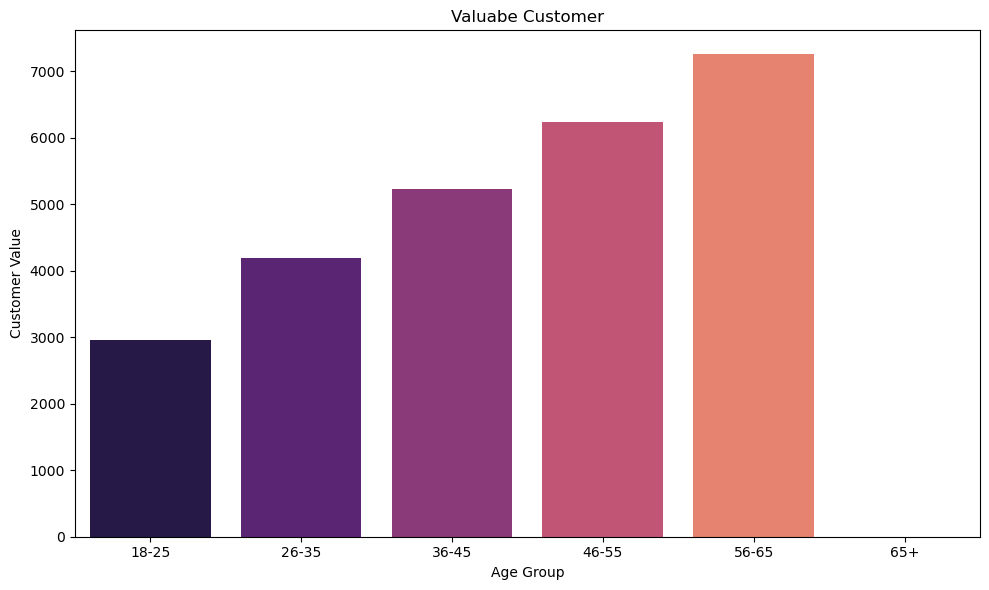

In [518]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='magma')

plt.title('Valuabe Customer')
plt.xlabel('Age Group')
plt.ylabel('Customer Value')
plt.tight_layout()
plt.show()

In [433]:
# View cluster characteristics
print(df.groupby('Cluster')[['Age', 'Income', 'Spending_Score', 'Loyalty_Score', 'Spending_to_Income_Ratio']].mean())

               Age        Income  Spending_Score  Loyalty_Score  \
Cluster                                                           
0        54.531034  59663.367458    12032.914129    1259.019467   
1        51.229122  56413.058012    11380.424826     223.147901   
2        28.090032  33047.465464     6718.160072     173.807065   
3        35.493197  40418.304491     8186.687534    1082.327358   

         Spending_to_Income_Ratio  
Cluster                            
0                       20.168641  
1                       20.173875  
2                       20.339958  
3                       20.256973  


In [434]:
# Basic stats for key numeric columns
print("Descriptive Statistics:")
print(df[['Last_Purchase_Amount', 'Purchase_Frequency']].describe())

# Additional stats- Median and standard deviation
print("\nMedian:")
print(df[['Last_Purchase_Amount', 'Purchase_Frequency']].median())

print("\nStandard Deviation:")
print(df[['Last_Purchase_Amount', 'Purchase_Frequency']].std())

Descriptive Statistics:
       Last_Purchase_Amount  Purchase_Frequency
count           1362.000000         1362.000000
mean            4931.689546           49.551706
std             1266.894447           27.074169
min             2057.551913            4.876052
25%             3962.190531           26.560455
50%             4972.893731           47.729713
75%             5962.991091           72.135292
max             7519.376995           99.492184

Median:
Last_Purchase_Amount    4972.893731
Purchase_Frequency        47.729713
dtype: float64

Standard Deviation:
Last_Purchase_Amount    1266.894447
Purchase_Frequency        27.074169
dtype: float64
